# Network Diagram - Relationship Visualization

**Use Case**: Visualize relationships, connections, networks (social networks, organizational charts, system dependencies)

This notebook demonstrates how to create effective network diagrams for analyzing relationships and connections between entities.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Set random seed for reproducibility
np.random.seed(42)

print("Network visualization libraries loaded!")
print("Note: For advanced network analysis, consider installing: pip install networkx python-louvain")


Network visualization libraries loaded!
Note: For advanced network analysis, consider installing: pip install networkx python-louvain


In [2]:
# Create sample network datasets
# 1. Social Network - Company employees
employees = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry', 'Iris', 'Jack']
departments = ['Engineering', 'Marketing', 'Sales', 'HR', 'Finance']

# Create employee relationships (who works with whom)
social_connections = [
    ('Alice', 'Bob', 'Engineering', 8),      # (person1, person2, relationship_type, strength)
    ('Alice', 'Charlie', 'Engineering', 9),
    ('Bob', 'Charlie', 'Engineering', 7),
    ('Diana', 'Eve', 'Marketing', 6),
    ('Diana', 'Frank', 'Cross-dept', 4),
    ('Eve', 'Grace', 'Marketing', 8),
    ('Frank', 'Henry', 'Sales', 7),
    ('Grace', 'Iris', 'Cross-dept', 5),
    ('Henry', 'Jack', 'Sales', 6),
    ('Alice', 'Diana', 'Cross-dept', 3),
    ('Charlie', 'Frank', 'Cross-dept', 4),
    ('Bob', 'Grace', 'Cross-dept', 2),
    ('Eve', 'Henry', 'Cross-dept', 3),
    ('Iris', 'Jack', 'Cross-dept', 5)
]

social_df = pd.DataFrame(social_connections, columns=['person1', 'person2', 'relationship', 'strength'])

# 2. Technology Stack Dependencies
tech_dependencies = [
    ('Frontend', 'API Gateway', 'depends_on', 1),
    ('API Gateway', 'Auth Service', 'depends_on', 1),
    ('API Gateway', 'User Service', 'depends_on', 1),
    ('API Gateway', 'Order Service', 'depends_on', 1),
    ('User Service', 'User Database', 'depends_on', 1),
    ('Order Service', 'Order Database', 'depends_on', 1),
    ('Order Service', 'Payment Service', 'depends_on', 1),
    ('Payment Service', 'Payment Database', 'depends_on', 1),
    ('Auth Service', 'Auth Database', 'depends_on', 1),
    ('User Service', 'Cache', 'depends_on', 1),
    ('Order Service', 'Message Queue', 'depends_on', 1),
    ('Payment Service', 'External API', 'depends_on', 1),
    ('Message Queue', 'Notification Service', 'triggers', 1),
    ('Notification Service', 'Email Service', 'depends_on', 1)
]

tech_df = pd.DataFrame(tech_dependencies, columns=['source', 'target', 'relationship', 'weight'])

# 3. Academic Citation Network
papers = ['Paper A', 'Paper B', 'Paper C', 'Paper D', 'Paper E', 'Paper F', 'Paper G', 'Paper H']
citations = [
    ('Paper A', 'Paper B', 3),  # (citing_paper, cited_paper, citation_count)
    ('Paper A', 'Paper C', 2),
    ('Paper B', 'Paper D', 4),
    ('Paper B', 'Paper E', 1),
    ('Paper C', 'Paper D', 2),
    ('Paper C', 'Paper F', 3),
    ('Paper D', 'Paper G', 5),
    ('Paper E', 'Paper F', 2),
    ('Paper F', 'Paper G', 3),
    ('Paper F', 'Paper H', 1),
    ('Paper G', 'Paper H', 2)
]

citation_df = pd.DataFrame(citations, columns=['citing', 'cited', 'count'])

print("Sample network datasets created:")
print(f"Social Network: {len(social_df)} connections between {len(employees)} employees")
print(f"Tech Dependencies: {len(tech_df)} dependencies between services")
print(f"Citation Network: {len(citation_df)} citations between {len(papers)} papers")


Sample network datasets created:
Social Network: 14 connections between 10 employees
Tech Dependencies: 14 dependencies between services
Citation Network: 11 citations between 8 papers


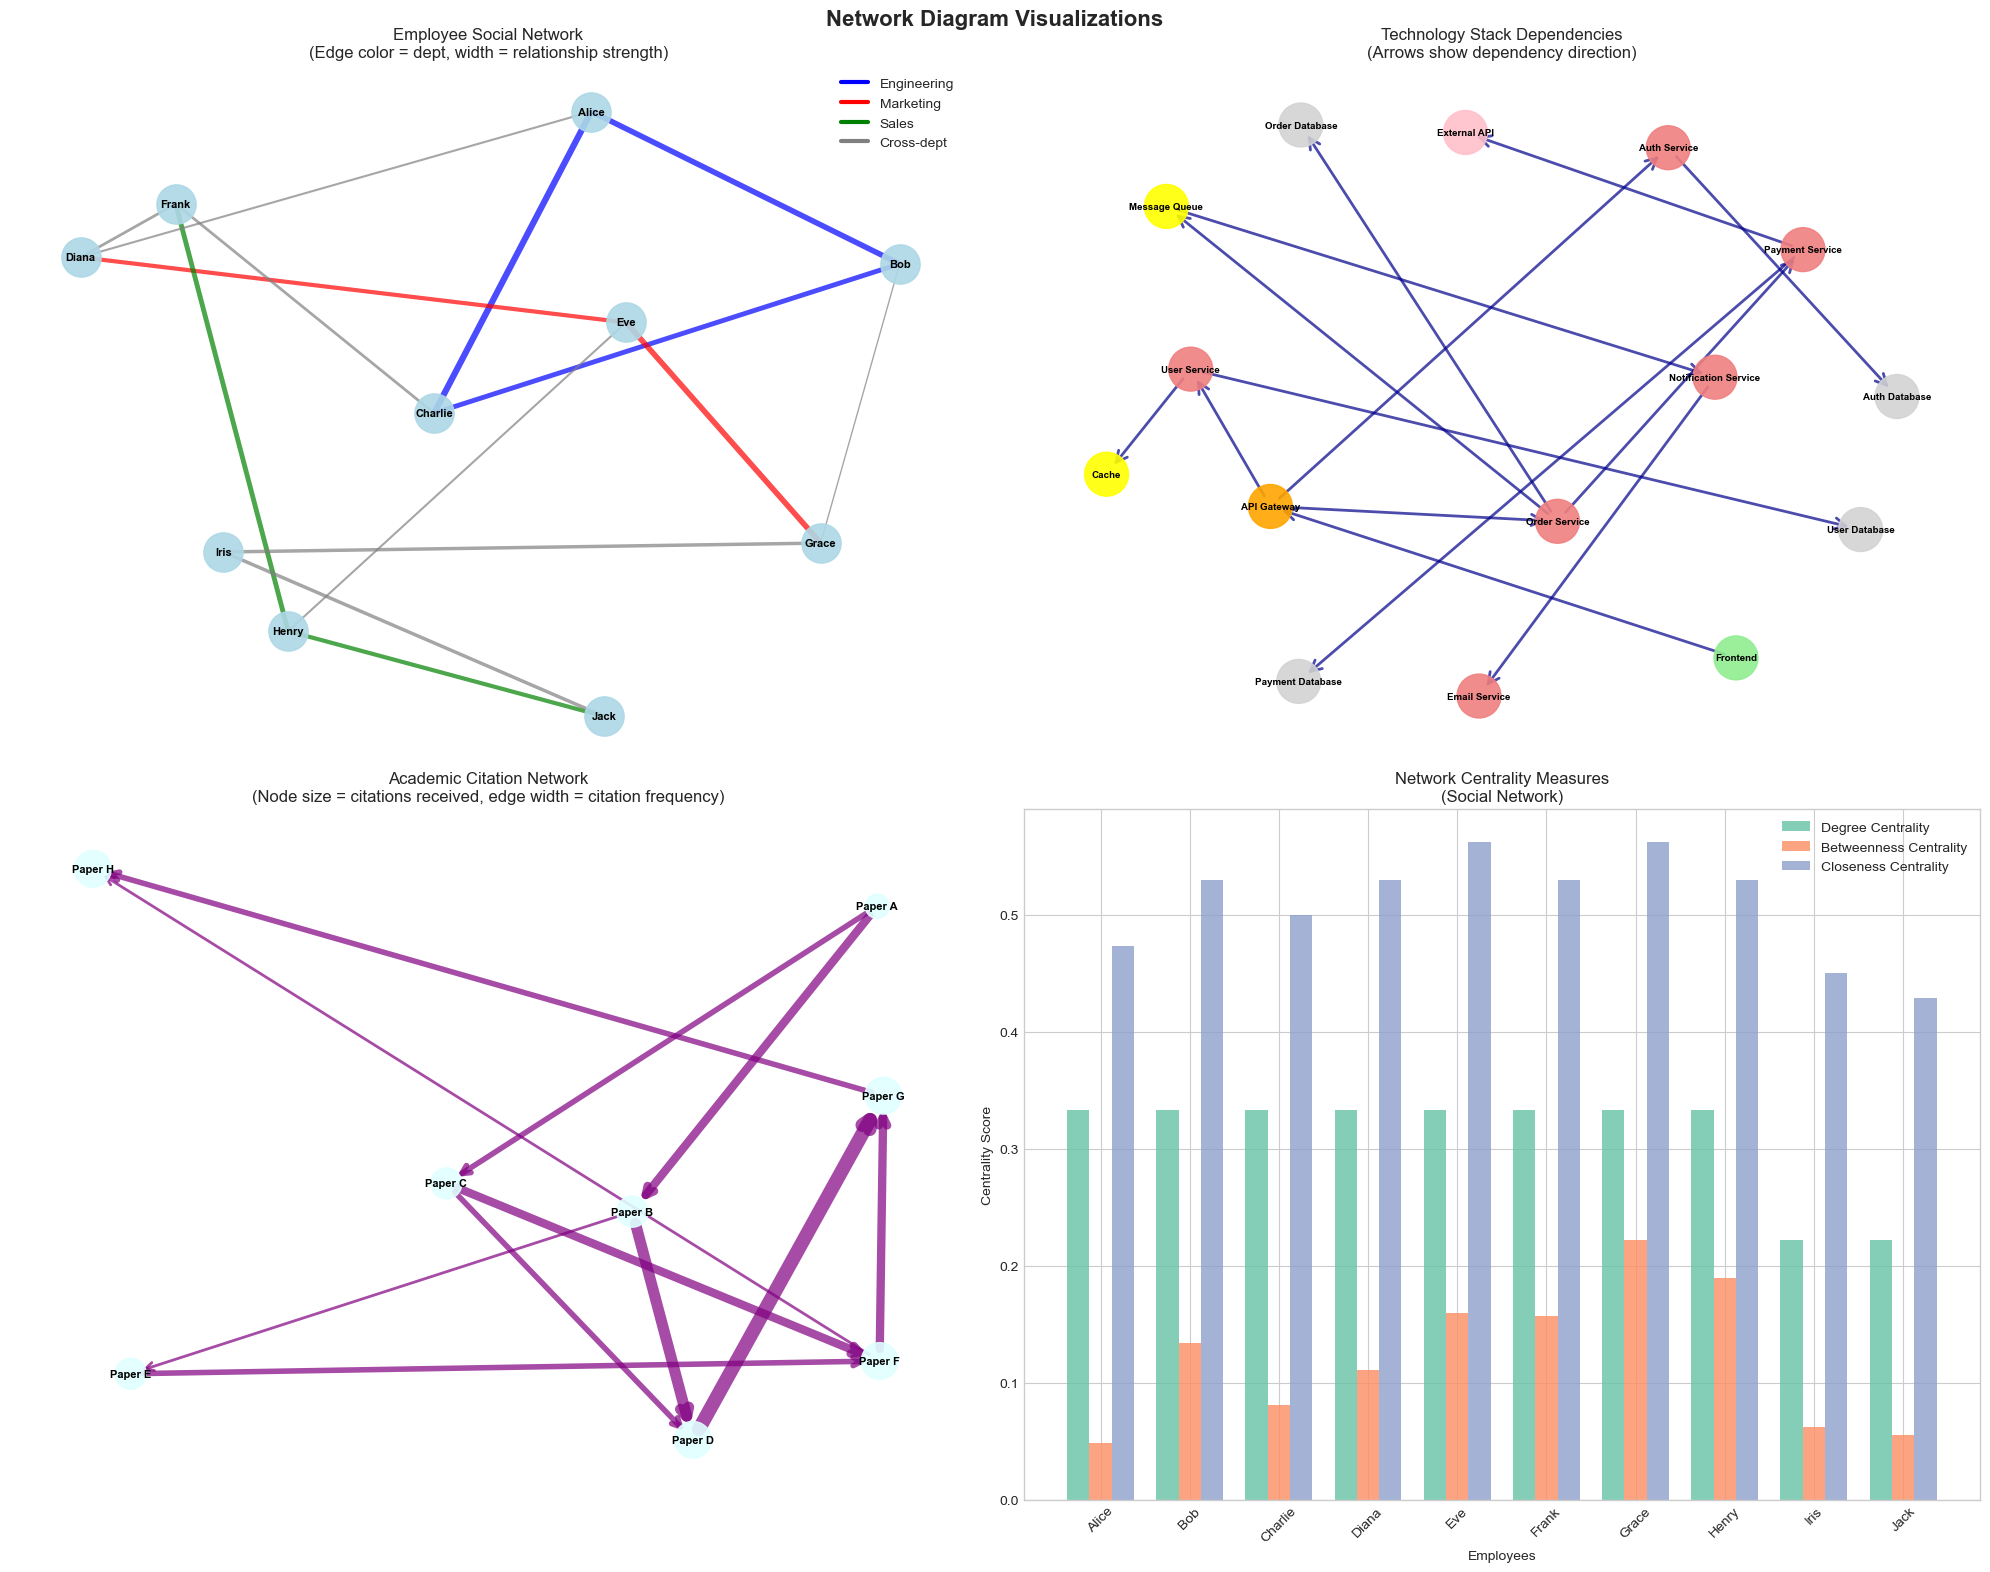

In [3]:
# Basic network visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Network Diagram Visualizations', fontsize=16, fontweight='bold')

# 1. Social Network - Employee Connections
ax1 = axes[0, 0]
G_social = nx.Graph()

# Add edges with weights
for _, row in social_df.iterrows():
    G_social.add_edge(row['person1'], row['person2'], 
                     weight=row['strength'], relationship=row['relationship'])

# Create layout
pos_social = nx.spring_layout(G_social, k=3, iterations=50)

# Draw edges with different colors by relationship type
relationship_colors = {'Engineering': 'blue', 'Marketing': 'red', 'Sales': 'green', 'Cross-dept': 'gray'}
for _, row in social_df.iterrows():
    edge_color = relationship_colors[row['relationship']]
    edge_width = row['strength'] / 2  # Scale edge width by strength
    nx.draw_networkx_edges(G_social, pos_social, 
                          edgelist=[(row['person1'], row['person2'])],
                          edge_color=edge_color, width=edge_width, alpha=0.7, ax=ax1)

# Draw nodes
nx.draw_networkx_nodes(G_social, pos_social, node_color='lightblue',
                      node_size=800, alpha=0.9, ax=ax1)
nx.draw_networkx_labels(G_social, pos_social, font_size=8, font_weight='bold', ax=ax1)

ax1.set_title('Employee Social Network\n(Edge color = dept, width = relationship strength)')
ax1.axis('off')

# Add legend
legend_elements = [plt.Line2D([0], [0], color=color, lw=3, label=dept) 
                  for dept, color in relationship_colors.items()]
ax1.legend(handles=legend_elements, loc='upper right')

# 2. Technology Dependency Graph
ax2 = axes[0, 1]
G_tech = nx.DiGraph()  # Directed graph for dependencies

# Add edges
for _, row in tech_df.iterrows():
    G_tech.add_edge(row['source'], row['target'], relationship=row['relationship'])

# Create hierarchical layout
pos_tech = nx.spring_layout(G_tech, k=2, iterations=50)

# Draw edges with arrows
nx.draw_networkx_edges(G_tech, pos_tech, edge_color='darkblue',
                      arrows=True, arrowsize=20, arrowstyle='->', 
                      width=2, alpha=0.7, ax=ax2)

# Color nodes by type
node_types = {
    'Frontend': 'lightgreen',
    'API Gateway': 'orange',
    'Auth Service': 'lightcoral',
    'User Service': 'lightcoral',
    'Order Service': 'lightcoral',
    'Payment Service': 'lightcoral',
    'Notification Service': 'lightcoral',
    'Email Service': 'lightcoral',
    'User Database': 'lightgray',
    'Order Database': 'lightgray',
    'Payment Database': 'lightgray',
    'Auth Database': 'lightgray',
    'Cache': 'yellow',
    'Message Queue': 'yellow',
    'External API': 'pink'
}

node_colors = [node_types.get(node, 'lightblue') for node in G_tech.nodes()]
nx.draw_networkx_nodes(G_tech, pos_tech, node_color=node_colors,
                      node_size=1000, alpha=0.9, ax=ax2)

# Draw labels with smaller font
nx.draw_networkx_labels(G_tech, pos_tech, font_size=7, font_weight='bold', ax=ax2)

ax2.set_title('Technology Stack Dependencies\n(Arrows show dependency direction)')
ax2.axis('off')

# 3. Citation Network
ax3 = axes[1, 0]
G_citation = nx.DiGraph()

# Add edges with citation counts as weights
for _, row in citation_df.iterrows():
    G_citation.add_edge(row['citing'], row['cited'], weight=row['count'])

pos_citation = nx.spring_layout(G_citation, k=2, iterations=50)

# Draw edges with width proportional to citation count
edges = G_citation.edges()
weights = [G_citation[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G_citation, pos_citation, 
                      width=[w*2 for w in weights],
                      edge_color='purple', arrows=True, arrowsize=15,
                      arrowstyle='->', alpha=0.7, ax=ax3)

# Size nodes by in-degree (how many times cited)
in_degrees = dict(G_citation.in_degree())
node_sizes = [in_degrees[node] * 200 + 300 for node in G_citation.nodes()]

nx.draw_networkx_nodes(G_citation, pos_citation, 
                      node_size=node_sizes, node_color='lightcyan',
                      alpha=0.9, ax=ax3)
nx.draw_networkx_labels(G_citation, pos_citation, font_size=8, font_weight='bold', ax=ax3)

ax3.set_title('Academic Citation Network\n(Node size = citations received, edge width = citation frequency)')
ax3.axis('off')

# 4. Network metrics visualization
ax4 = axes[1, 1]

# Calculate various network metrics for social network
degree_centrality = nx.degree_centrality(G_social)
betweenness_centrality = nx.betweenness_centrality(G_social)
closeness_centrality = nx.closeness_centrality(G_social)

# Create metrics dataframe
metrics_data = []
for node in G_social.nodes():
    metrics_data.append({
        'person': node,
        'degree': degree_centrality[node],
        'betweenness': betweenness_centrality[node],
        'closeness': closeness_centrality[node]
    })

metrics_df = pd.DataFrame(metrics_data)

# Plot centrality measures
x_pos = range(len(metrics_df))
width = 0.25

ax4.bar([x - width for x in x_pos], metrics_df['degree'], width, 
        label='Degree Centrality', alpha=0.8)
ax4.bar(x_pos, metrics_df['betweenness'], width, 
        label='Betweenness Centrality', alpha=0.8)
ax4.bar([x + width for x in x_pos], metrics_df['closeness'], width, 
        label='Closeness Centrality', alpha=0.8)

ax4.set_xlabel('Employees')
ax4.set_ylabel('Centrality Score')
ax4.set_title('Network Centrality Measures\n(Social Network)')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(metrics_df['person'], rotation=45)
ax4.legend()

plt.tight_layout()
plt.show()


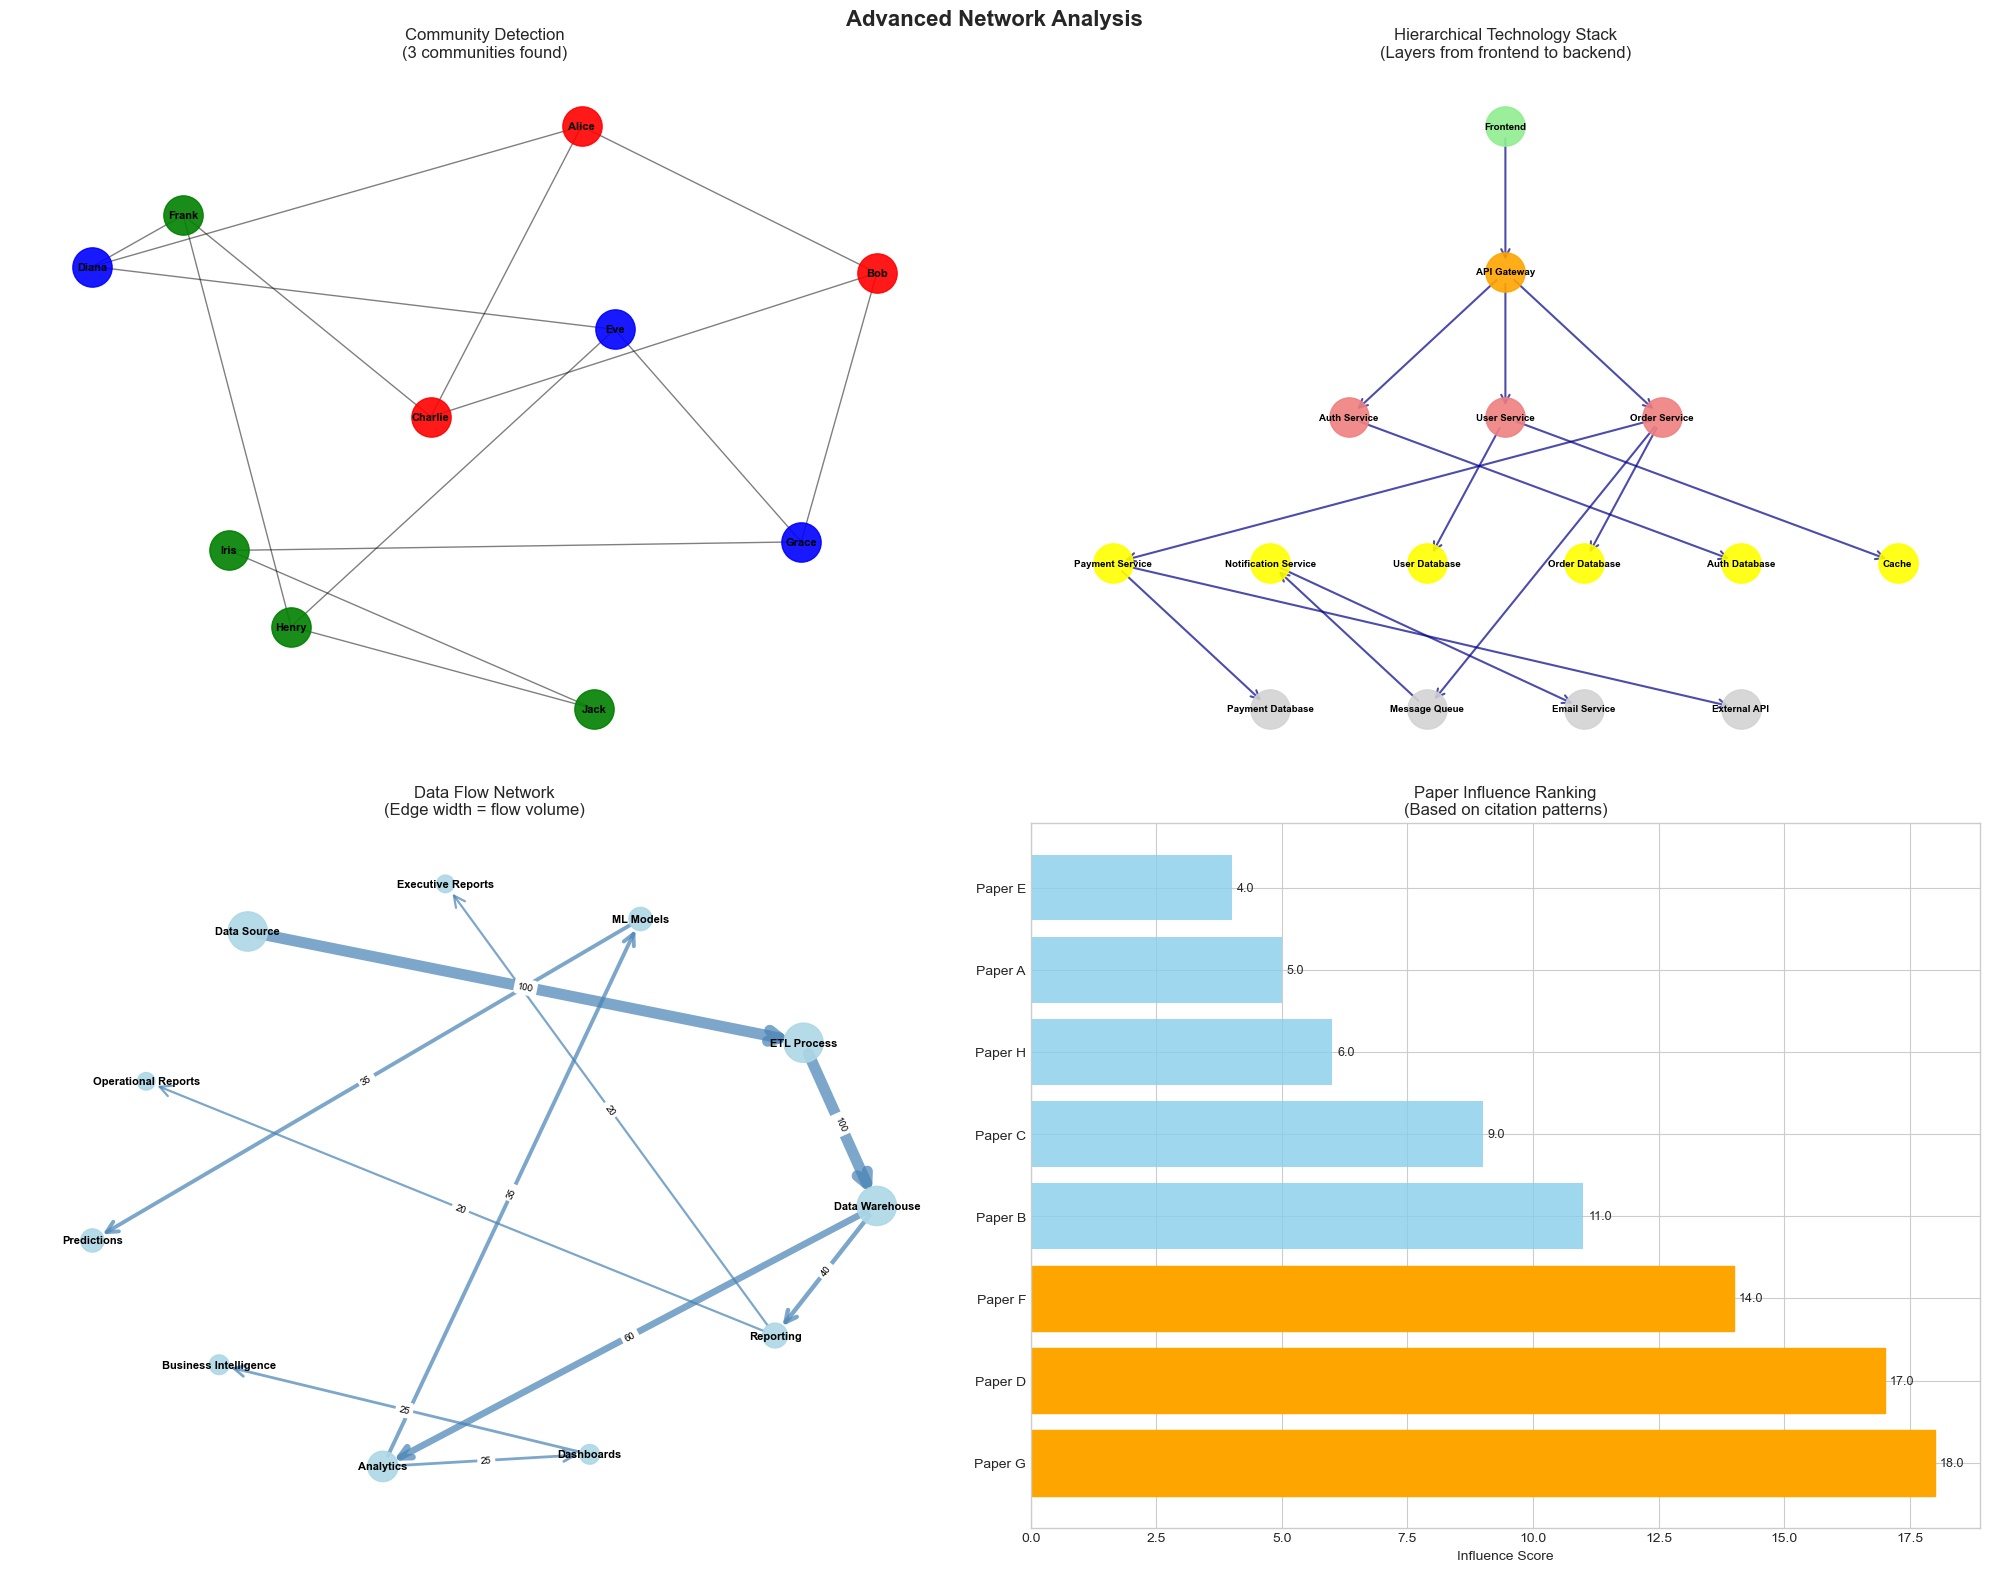

In [4]:
# Advanced network analysis and visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Advanced Network Analysis', fontsize=16, fontweight='bold')

# 1. Community Detection in Social Network
ax1 = axes[0, 0]

# Detect communities using modularity
import community as community_louvain  # Note: requires python-louvain
try:
    partition = community_louvain.best_partition(G_social)
    community_colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
    
    # Draw nodes colored by community
    for i, (node, community_id) in enumerate(partition.items()):
        nx.draw_networkx_nodes(G_social, pos_social, 
                              nodelist=[node],
                              node_color=community_colors[community_id % len(community_colors)],
                              node_size=800, alpha=0.9, ax=ax1)
    
    # Draw edges
    nx.draw_networkx_edges(G_social, pos_social, alpha=0.5, ax=ax1)
    nx.draw_networkx_labels(G_social, pos_social, font_size=8, font_weight='bold', ax=ax1)
    
    ax1.set_title(f'Community Detection\n({len(set(partition.values()))} communities found)')
    
except ImportError:
    # Fallback: manual community assignment
    manual_communities = {
        'Alice': 0, 'Bob': 0, 'Charlie': 0,  # Engineering
        'Diana': 1, 'Eve': 1, 'Grace': 1,    # Marketing
        'Frank': 2, 'Henry': 2, 'Jack': 2,   # Sales
        'Iris': 1  # Marketing
    }
    
    community_colors = ['red', 'blue', 'green']
    for node in G_social.nodes():
        community_id = manual_communities.get(node, 0)
        nx.draw_networkx_nodes(G_social, pos_social, 
                              nodelist=[node],
                              node_color=community_colors[community_id],
                              node_size=800, alpha=0.9, ax=ax1)
    
    nx.draw_networkx_edges(G_social, pos_social, alpha=0.5, ax=ax1)
    nx.draw_networkx_labels(G_social, pos_social, font_size=8, font_weight='bold', ax=ax1)
    ax1.set_title('Community Structure\n(Manual grouping by department)')

ax1.axis('off')

# 2. Hierarchical Network Layout (Tech Stack)
ax2 = axes[0, 1]

# Create a hierarchical layout for tech stack
hierarchy_levels = {
    'Frontend': 0,
    'API Gateway': 1,
    'Auth Service': 2, 'User Service': 2, 'Order Service': 2,
    'Payment Service': 3, 'Notification Service': 3,
    'User Database': 3, 'Order Database': 3, 'Auth Database': 3,
    'Payment Database': 4, 'Cache': 3, 'Message Queue': 4,
    'Email Service': 4, 'External API': 4
}

# Position nodes by hierarchy level
pos_hierarchical = {}
level_counts = {}
for node, level in hierarchy_levels.items():
    if level not in level_counts:
        level_counts[level] = 0
    level_counts[level] += 1
    
    # Calculate x position within level
    nodes_at_level = [n for n, l in hierarchy_levels.items() if l == level]
    x_offset = (level_counts[level] - 1) - (len(nodes_at_level) - 1) / 2
    
    pos_hierarchical[node] = (x_offset * 2, -level * 2)

# Draw the hierarchical network
nx.draw_networkx_edges(G_tech, pos_hierarchical, edge_color='darkblue',
                      arrows=True, arrowsize=15, arrowstyle='->', 
                      width=1.5, alpha=0.7, ax=ax2)

# Color nodes by layer
layer_colors = ['lightgreen', 'orange', 'lightcoral', 'yellow', 'lightgray']
for node in G_tech.nodes():
    level = hierarchy_levels.get(node, 0)
    color = layer_colors[level % len(layer_colors)]
    nx.draw_networkx_nodes(G_tech, pos_hierarchical, 
                          nodelist=[node], node_color=color,
                          node_size=800, alpha=0.9, ax=ax2)

nx.draw_networkx_labels(G_tech, pos_hierarchical, font_size=7, font_weight='bold', ax=ax2)
ax2.set_title('Hierarchical Technology Stack\n(Layers from frontend to backend)')
ax2.axis('off')

# 3. Network Flow Analysis
ax3 = axes[1, 0]

# Create a flow network showing information flow
G_flow = nx.DiGraph()
flow_data = [
    ('Data Source', 'ETL Process', 100),
    ('ETL Process', 'Data Warehouse', 100),
    ('Data Warehouse', 'Analytics', 60),
    ('Data Warehouse', 'Reporting', 40),
    ('Analytics', 'ML Models', 35),
    ('Analytics', 'Dashboards', 25),
    ('Reporting', 'Executive Reports', 20),
    ('Reporting', 'Operational Reports', 20),
    ('ML Models', 'Predictions', 35),
    ('Dashboards', 'Business Intelligence', 25)
]

for source, target, flow in flow_data:
    G_flow.add_edge(source, target, flow=flow)

pos_flow = nx.spring_layout(G_flow, k=3, iterations=50)

# Draw edges with width proportional to flow
edges = G_flow.edges()
flows = [G_flow[u][v]['flow'] for u, v in edges]
max_flow = max(flows)
edge_widths = [f/max_flow * 8 for f in flows]

nx.draw_networkx_edges(G_flow, pos_flow, width=edge_widths,
                      edge_color='steelblue', arrows=True, arrowsize=20,
                      arrowstyle='->', alpha=0.7, ax=ax3)

# Draw nodes with size proportional to in-flow
in_flows = {}
for node in G_flow.nodes():
    in_flows[node] = sum(G_flow[pred][node]['flow'] for pred in G_flow.predecessors(node))
    if in_flows[node] == 0:  # Source nodes
        in_flows[node] = 100

node_sizes = [in_flows[node] * 8 for node in G_flow.nodes()]
nx.draw_networkx_nodes(G_flow, pos_flow, node_size=node_sizes,
                      node_color='lightblue', alpha=0.9, ax=ax3)

nx.draw_networkx_labels(G_flow, pos_flow, font_size=8, font_weight='bold', ax=ax3)

# Add flow labels on edges
edge_labels = {(u, v): f"{G_flow[u][v]['flow']}" for u, v in G_flow.edges()}
nx.draw_networkx_edge_labels(G_flow, pos_flow, edge_labels, font_size=7, ax=ax3)

ax3.set_title('Data Flow Network\n(Edge width = flow volume)')
ax3.axis('off')

# 4. Influence Network Analysis
ax4 = axes[1, 1]

# Calculate influence metrics for citation network
influence_scores = {}
for node in G_citation.nodes():
    # Simple influence: citations received + weighted citations given
    citations_received = G_citation.in_degree(node, weight='weight')
    citations_given = G_citation.out_degree(node, weight='weight')
    influence_scores[node] = citations_received * 2 + citations_given  # Weight received citations more

# Create influence visualization
sorted_papers = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)
papers_sorted = [p[0] for p in sorted_papers]
scores_sorted = [p[1] for p in sorted_papers]

bars = ax4.barh(papers_sorted, scores_sorted, color='skyblue', alpha=0.8)
ax4.set_xlabel('Influence Score')
ax4.set_title('Paper Influence Ranking\n(Based on citation patterns)')

# Add value labels on bars
for i, (paper, score) in enumerate(sorted_papers):
    ax4.text(score + 0.1, i, f'{score:.1f}', va='center', fontsize=9)

# Highlight top 3
for i in range(min(3, len(bars))):
    bars[i].set_color('orange')
    bars[i].set_alpha(1.0)

plt.tight_layout()
plt.show()


In [5]:
# Network statistics and analysis
print("Network Analysis Results:")
print("=" * 50)

# 1. Social Network Analysis
print("1. SOCIAL NETWORK STATISTICS:")
print(f"   Nodes (employees): {G_social.number_of_nodes()}")
print(f"   Edges (connections): {G_social.number_of_edges()}")
print(f"   Network density: {nx.density(G_social):.3f}")
print(f"   Average clustering coefficient: {nx.average_clustering(G_social):.3f}")

# Check if network is connected
if nx.is_connected(G_social):
    print(f"   Average shortest path length: {nx.average_shortest_path_length(G_social):.2f}")
    print(f"   Network diameter: {nx.diameter(G_social)}")
else:
    print("   Network is not fully connected")

# Top employees by centrality
print(f"\n   Top 3 Most Central Employees:")
degree_cent = nx.degree_centrality(G_social)
betweenness_cent = nx.betweenness_centrality(G_social)
closeness_cent = nx.closeness_centrality(G_social)

top_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:3]
top_betweenness = sorted(betweenness_cent.items(), key=lambda x: x[1], reverse=True)[:3]
top_closeness = sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True)[:3]

print(f"     By connections: {', '.join([f'{name} ({score:.3f})' for name, score in top_degree])}")
print(f"     By betweenness: {', '.join([f'{name} ({score:.3f})' for name, score in top_betweenness])}")
print(f"     By closeness: {', '.join([f'{name} ({score:.3f})' for name, score in top_closeness])}")

# 2. Technology Network Analysis
print(f"\n2. TECHNOLOGY DEPENDENCY ANALYSIS:")
print(f"   Services/components: {G_tech.number_of_nodes()}")
print(f"   Dependencies: {G_tech.number_of_edges()}")

# Find critical services (high in-degree)
in_degrees = dict(G_tech.in_degree())
out_degrees = dict(G_tech.out_degree())

critical_services = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
dependency_heavy = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"   Most depended-upon services:")
for service, count in critical_services:
    if count > 0:
        print(f"     {service}: {count} services depend on it")

print(f"   Services with most dependencies:")
for service, count in dependency_heavy:
    if count > 0:
        print(f"     {service}: depends on {count} other services")

# Check for cycles (potential circular dependencies)
try:
    cycles = list(nx.simple_cycles(G_tech))
    if cycles:
        print(f"   Circular dependencies detected: {len(cycles)}")
        for cycle in cycles[:3]:  # Show first 3
            print(f"     {' → '.join(cycle + [cycle[0]])}")
    else:
        print(f"   No circular dependencies found ✓")
except:
    print(f"   Cycle detection not available")

# 3. Citation Network Analysis
print(f"\n3. CITATION NETWORK ANALYSIS:")
print(f"   Papers: {G_citation.number_of_nodes()}")
print(f"   Citation relationships: {G_citation.number_of_edges()}")

# Calculate citation statistics
total_citations = sum(G_citation[u][v]['weight'] for u, v in G_citation.edges())
avg_citations_per_paper = total_citations / G_citation.number_of_nodes()

print(f"   Total citations: {total_citations}")
print(f"   Average citations per paper: {avg_citations_per_paper:.1f}")

# Find most cited and most citing papers
citations_received = {}
citations_given = {}

for node in G_citation.nodes():
    citations_received[node] = sum(G_citation[pred][node]['weight'] 
                                 for pred in G_citation.predecessors(node))
    citations_given[node] = sum(G_citation[node][succ]['weight'] 
                              for succ in G_citation.successors(node))

most_cited = sorted(citations_received.items(), key=lambda x: x[1], reverse=True)[:3]
most_citing = sorted(citations_given.items(), key=lambda x: x[1], reverse=True)[:3]

print(f"   Most cited papers:")
for paper, count in most_cited:
    print(f"     {paper}: {count} citations received")

print(f"   Papers citing most others:")
for paper, count in most_citing:
    print(f"     {paper}: {count} citations given")

# 4. Network Patterns and Insights
print(f"\n4. NETWORK PATTERNS & INSIGHTS:")

# Small world properties
try:
    # Calculate small-world metrics for social network
    clustering = nx.average_clustering(G_social)
    if nx.is_connected(G_social):
        path_length = nx.average_shortest_path_length(G_social)
        # Compare to random network
        random_G = nx.erdos_renyi_graph(G_social.number_of_nodes(), 
                                       G_social.number_of_edges() / (G_social.number_of_nodes() * (G_social.number_of_nodes() - 1) / 2))
        random_clustering = nx.average_clustering(random_G)
        random_path_length = nx.average_shortest_path_length(random_G) if nx.is_connected(random_G) else 0
        
        if random_path_length > 0:
            small_world_sigma = (clustering / random_clustering) / (path_length / random_path_length)
            print(f"   Small-world coefficient (σ): {small_world_sigma:.3f}")
            if small_world_sigma > 1:
                print(f"     → Social network exhibits small-world properties ✓")
            else:
                print(f"     → Social network does not show clear small-world properties")
except:
    print(f"   Small-world analysis not available")

# Network robustness
print(f"\n   Network Robustness Analysis:")
if nx.is_connected(G_social):
    # Find articulation points (critical nodes)
    articulation_points = list(nx.articulation_points(G_social))
    if articulation_points:
        print(f"     Critical employees (if removed, network fragments): {', '.join(articulation_points)}")
    else:
        print(f"     No single critical employee (robust network) ✓")
        
    # Find bridges (critical connections)
    bridges = list(nx.bridges(G_social))
    if bridges:
        print(f"     Critical connections: {len(bridges)} bridge(s)")
        for bridge in bridges[:3]:  # Show first 3
            print(f"       {bridge[0]} ↔ {bridge[1]}")
    else:
        print(f"     No critical connections (well-connected network) ✓")

print(f"\nNetwork Visualization Best Practices:")
print("✓ Use node size to represent importance (degree, centrality)")
print("✓ Use edge width to show relationship strength")
print("✓ Color nodes by categories or communities")
print("✓ Position nodes meaningfully (hierarchy, clustering)")
print("✓ Add arrows for directed relationships")
print("✓ Include legends for colors and sizes")
print("✓ Avoid overcrowded layouts for large networks")
print("✓ Consider interactive visualizations for exploration")

print(f"\nCommon Network Analysis Applications:")
print("• Social networks: Influence, communities, information spread")
print("• Technology: Dependencies, architecture, failure analysis")
print("• Business: Supply chains, organizational structure")
print("• Academic: Citation analysis, collaboration networks")
print("• Transportation: Route optimization, network efficiency")
print("• Biological: Protein interactions, food webs")


Network Analysis Results:
1. SOCIAL NETWORK STATISTICS:
   Nodes (employees): 10
   Edges (connections): 14
   Network density: 0.311
   Average clustering coefficient: 0.100
   Average shortest path length: 1.98
   Network diameter: 4

   Top 3 Most Central Employees:
     By connections: Alice (0.333), Bob (0.333), Charlie (0.333)
     By betweenness: Grace (0.222), Henry (0.190), Eve (0.160)
     By closeness: Eve (0.562), Grace (0.562), Bob (0.529)

2. TECHNOLOGY DEPENDENCY ANALYSIS:
   Services/components: 15
   Dependencies: 14
   Most depended-upon services:
     API Gateway: 1 services depend on it
     Auth Service: 1 services depend on it
     User Service: 1 services depend on it
     Order Service: 1 services depend on it
     User Database: 1 services depend on it
   Services with most dependencies:
     API Gateway: depends on 3 other services
     Order Service: depends on 3 other services
     User Service: depends on 2 other services
     Payment Service: depends on 2 